# Solar flares
## Análisis exploratorio de datos (EDA)

El objetivo de esta libreta es realizar un primer acercamiento al conjunto de datos de Solar Flare.

Estos datos se obtuvieron del repositorio de datos de Machine Learning de UC Irvine en https://archive.ics.uci.edu/dataset/89/solar+flare y contienen información acerca de erupciones solares registradas en los años de 19XX y 19XX.

Dentro del dataset, encontramos información de 13 variables de llamaradas solares como el tamaño de la erupción (pequeño o grande) y si la erupción creció o permaneció estática, así como la clasificación de las erupciones solares de acuerdo a su intensidad, la cual puede tomar la clasificación C, M o X.

Aquí importamos algunas de las librerías que utilizaremos para éste primer análisis exploratorio.

In [55]:
# Escenciales
import numpy as np
from numpy import cov
import pandas as pd

# Utilidades
import math
import time
import datetime
from scipy.stats import uniform, randint
from sklearn.utils import shuffle

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB
#import xgboost as xgb

# Análisis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, cross_validate, KFold
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, roc_curve, auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

# Misceláneo
import itertools

Vamos a crear también un diccionario de datos que incluya el nombre de la variable y la descripción de los campos.

In [1]:
data = {
    "Variable Name": [
        "modified Zurich class", "largest spot size", "spot distribution",
        "activity", "evolution", "previous 24 hour flare activity",
        "historically-complex", "became complex on this pass",
        "area", "area of largest spot", "common flares",
        "moderate flares", "severe flares"
    ],
    "Role": [
        "Feature", "Feature", "Feature",
        "Feature", "Feature", "Feature",
        "Feature", "Feature",
        "Feature", "Feature", "Target",
        "Target", "Target"
    ],
    "Type": [
        "Categorical", "Categorical", "Categorical",
        "Integer", "Integer", "Integer",
        "Integer", "Integer",
        "Integer", "Integer", "Integer",
        "Integer", "Integer"
    ],
    "Description": [
        "A,B,C,D,E,F,H", "X,R,S,A,H,K", "X,O,I,C",
        "1 = reduced, 2 = unchanged", "1 = decay, 2 = no growth, 3 = growth",
        "1 = nothing as big as an M1, 2 = one M1, 3 = more activity than one M1",
        "1 = Yes, 2 = No",
        "Did region become historically complex on this pass across the sun's disk (1 = yes, 2 = no)",
        "1 = small, 2 = large", "1 = <=5, 2 = >5",
        "C-class flares production by this region in the following 24 hours",
        "M-class flares production by this region in the following 24 hours",
        "X-class flares production by this region in the following 24 hours"
    ],
    "Units": [""] * 13,
    "Missing Values": ["no"] * 13
}

df = pd.DataFrame(data)
df

,Variable Name,Role,Type,Description,Units,Missing Values
0,modified Zurich class,Feature,Categorical,"A,B,C,D,E,F,H",,no
1,largest spot size,Feature,Categorical,"X,R,S,A,H,K",,no
2,spot distribution,Feature,Categorical,"X,O,I,C",,no
3,activity,Feature,Integer,"1 = reduced, 2 = unchanged",,no
4,evolution,Feature,Integer,"1 = decay, 2 = no growth, 3 = growth",,no
5,previous 24 hour flare activity,Feature,Integer,"1 = nothing as big as an M1, 2 = one M1, 3 = m...",,no
6,historically-complex,Feature,Integer,"1 = Yes, 2 = No",,no
7,became complex on this pass,Feature,Integer,Did region become historically complex on this...,,no
8,area,Feature,Integer,"1 = small, 2 = large",,no
9,area of largest spot,Feature,Integer,"1 = <=5, 2 = >5",,no


Podemos notar que la mayoría prácticamente todas nuestras variables son categóricas, por lo que necesitamos hacer un par de transformaciones para poder manipular nuestra información.

### Lectura de nuestro dataset

In [2]:
names = [
    "modified Zurich class", "largest spot size", "spot distribution",
    "activity", "evolution", "previous 24 hour flare activity",
    "historically-complex", "became complex on this pass",
    "area", "area of largest spot", "common flares",
    "moderate flares", "severe flares"
]

In [3]:
import pandas as pd
file_path_1 = '/content/flare.data1'
file_path_2 = '/content/flare.data2'

df_1 = pd.read_csv(file_path_1, delim_whitespace=True, skiprows=1, header=None, names=names)
df_2 = pd.read_csv(file_path_2, delim_whitespace=True, skiprows=1, header=None, names=names)

<ipython-input-3-c2504c6f86a2>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_1 = pd.read_csv(file_path_1, delim_whitespace=True, skiprows=1, header=None, names=names)
<ipython-input-3-c2504c6f86a2>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_2 = pd.read_csv(file_path_2, delim_whitespace=True, skiprows=1, header=None, names=names)


In [6]:
df = pd.concat([df_1, df_2])

In [7]:
df

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0


Vamos a tranformar nuestras variables de texto en ordinales.

In [10]:
ord_enc = OrdinalEncoder()
df['modified Zurich class'] = ord_enc.fit_transform(df[['modified Zurich class']])
df['largest spot size'] = ord_enc.fit_transform(df[['largest spot size']])
df['spot distribution'] = ord_enc.fit_transform(df[['spot distribution']])

In [ ]:
df

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
0,1.0,4.0,2.0,1,2,1,1,2,1,2,0,0,0
1,2.0,4.0,2.0,1,3,1,1,2,1,2,0,0,0
2,1.0,4.0,2.0,1,3,1,1,2,1,1,0,0,0
3,2.0,4.0,2.0,1,3,1,1,2,1,2,0,0,0
4,2.0,0.0,2.0,1,3,1,1,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,5.0,4.0,3.0,1,2,1,1,1,1,1,0,0,0
1062,5.0,4.0,3.0,2,2,1,1,2,1,1,0,0,0
1063,1.0,4.0,2.0,1,2,1,2,2,1,1,0,0,0
1064,5.0,3.0,3.0,1,2,1,1,2,1,1,0,0,0


Chequemos colinearidad. Podemos ver que la única correlación preocupan es la que se presenta entre spot_distribution y modified Zurch class, lo que hace sentido ya que la clase modificada de Zurich es una clasificación que se da de acuerdo al tamaño de la mancha de fenómenos solares.

<Axes: >

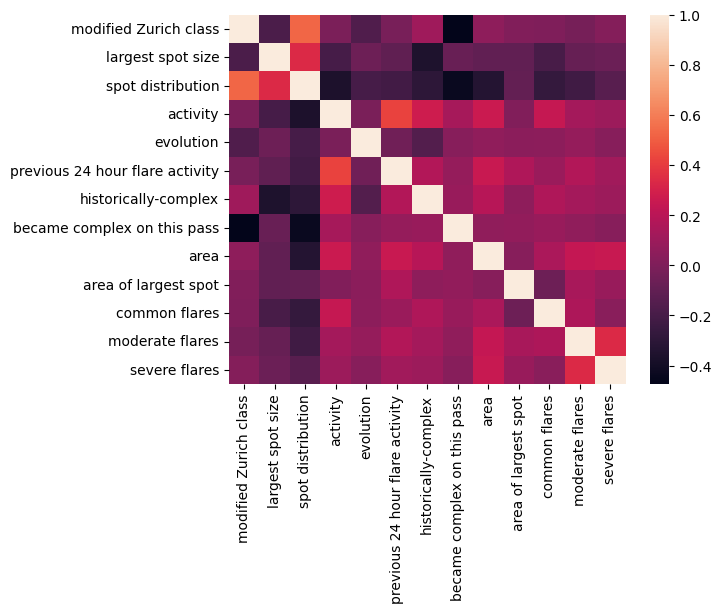

In [12]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

Algunos otros estadísticos importantes.

In [15]:
summary = df.describe()
summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

In [16]:
summary

,modified Zurich class,largest spot size,spot distribution,activity,evolution,previous 24 hour flare activity,historically-complex,became complex on this pass,area,area of largest spot,common flares,moderate flares,severe flares
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,2.500360,2.951764,1.982721,1.150468,2.421166,1.089993,1.395968,1.892009,1.025918,1.175666,0.261339,0.067675,0.009359
std,1.834517,1.716543,0.815725,0.357658,0.617129,0.403292,0.489234,0.310481,0.158948,0.380673,0.760201,0.353695,0.103534
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,3.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,8.000000,5.000000,2.000000
+3_std,8.003912,8.101392,4.429896,2.223443,4.272554,2.299870,2.863670,2.823452,1.502761,2.317684,2.541944,1.128758,0.319961
-3_std,-3.003192,-2.197864,-0.464454,0.077493,0.569779,-0.119884,-0.071733,0.960565,0.549075,0.033648,-2.019265,-0.993409,-0.301242


Para nuestro proyecto, vamos a crear un modelo que trata de predicir si se producirá alguna erupción solar con base en los datos de imágenes. Para esto, sumaremos las variables common flares, moderate flares y severe flares, de forma que nuestra variable objetivo tiene la siguiente lógica:


*   1: Si existe alguna erupción solar (independientemente de su tamaño)
*   0: Si no se presentó ninguna erupción solar.



In [20]:
df["sum of flares"] = df["common flares"] + df["moderate flares"] + df["severe flares"]

In [21]:
df["sum of flares"]

,sum of flares
0,0
1,0
2,0
3,0
4,0
...,...
1061,0
1062,0
1063,0
1064,0


In [43]:
df["target"] = [1 if x > 0 else 0 for x in df["sum of flares"]]

In [44]:
df["target"]

,target
0,0
1,0
2,0
3,0
4,0
...,...
1061,0
1062,0
1063,0
1064,0


Exportamos entonces nuestra data procesada.

In [56]:
df.to_csv("flare_data_processed.csv", sep = ',')

### Modified Zurich class

<Axes: xlabel='modified Zurich class'>

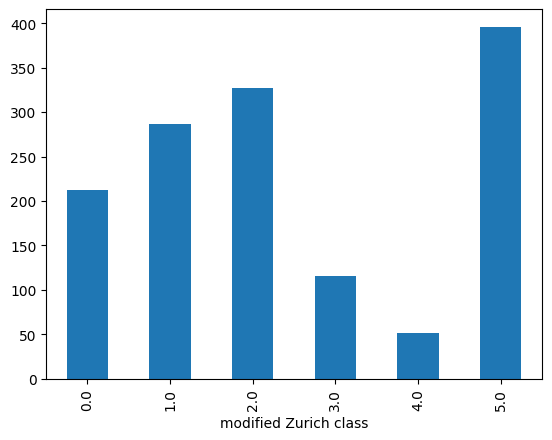

In [23]:
df['modified Zurich class'].value_counts().sort_index().plot(kind='bar')

### Largest spot size

<Axes: xlabel='largest spot size'>

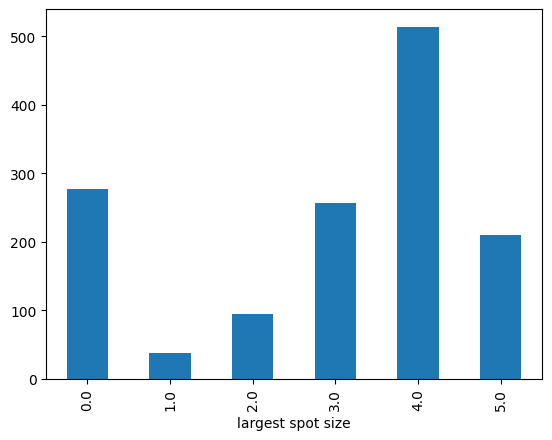

In [24]:
df['largest spot size'].value_counts().sort_index().plot(kind='bar')

### Spot distribution

<Axes: xlabel='spot distribution'>

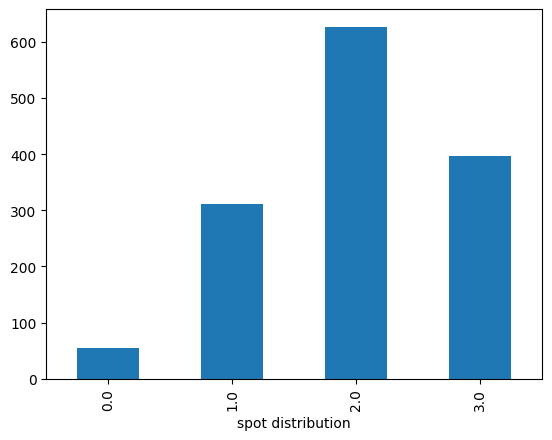

In [26]:
df['spot distribution'].value_counts().sort_index().plot(kind='bar')

### Activity

<Axes: xlabel='activity'>

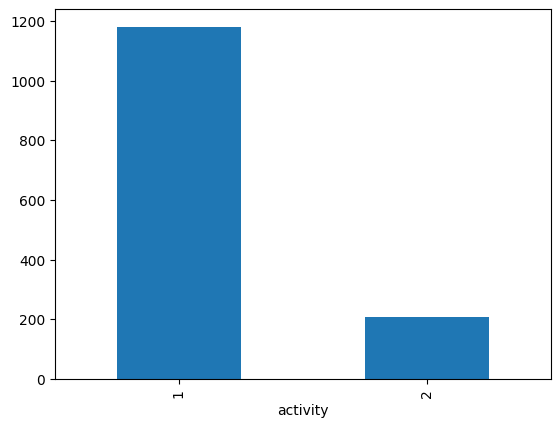

In [27]:
df['activity'].value_counts().sort_index().plot(kind='bar')

### Evolution

<Axes: xlabel='evolution'>

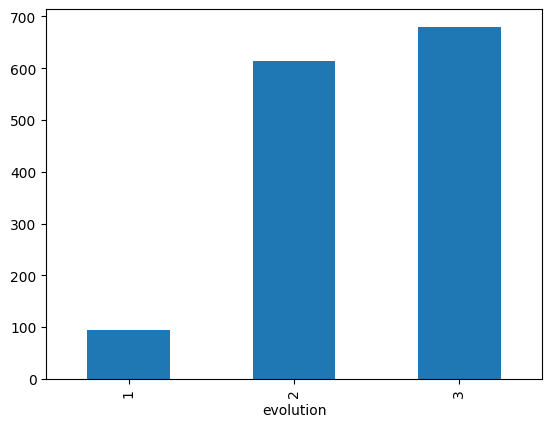

In [28]:
df['evolution'].value_counts().sort_index().plot(kind='bar')

### Previous 24 hour flare activity

<Axes: xlabel='previous 24 hour flare activity'>

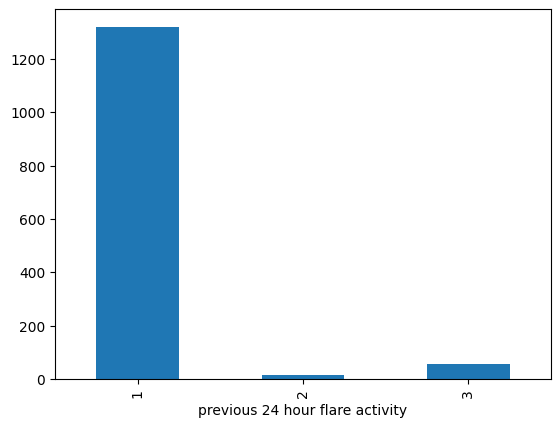

In [30]:
df['previous 24 hour flare activity'].value_counts().sort_index().plot(kind='bar')

### Historically-complex

<Axes: xlabel='historically-complex'>

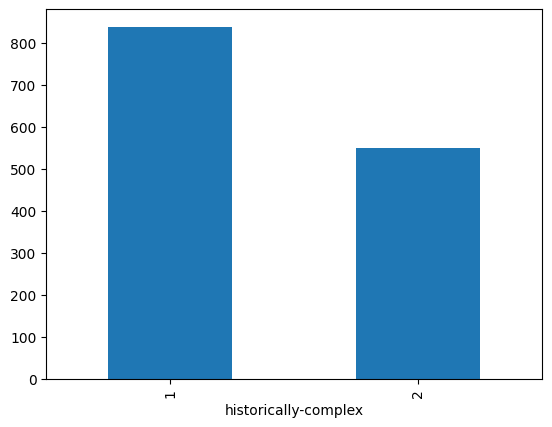

In [31]:
df['historically-complex'].value_counts().sort_index().plot(kind='bar')

### Became complex on this pass

<Axes: xlabel='became complex on this pass'>

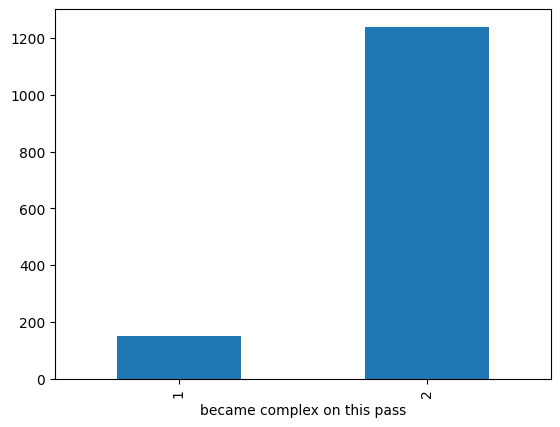

In [33]:
df['became complex on this pass'].value_counts().sort_index().plot(kind='bar')

### Area

<Axes: xlabel='area'>

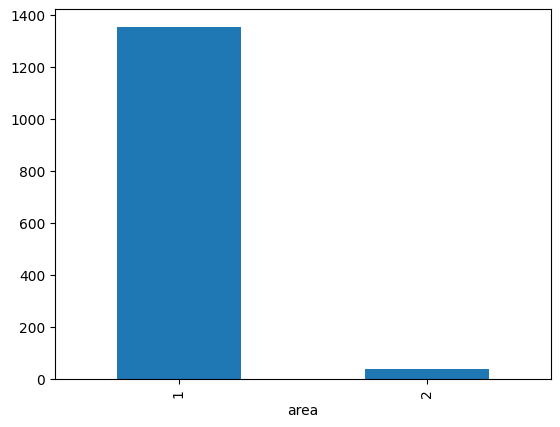

In [35]:
df['area'].value_counts().sort_index().plot(kind='bar')

### Area of largest spot

<Axes: xlabel='area of largest spot'>

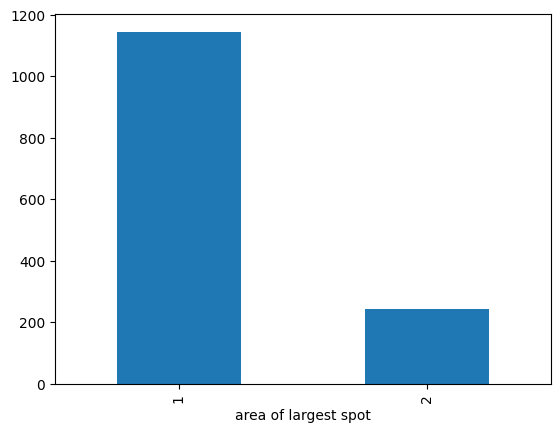

In [36]:
df['area of largest spot'].value_counts().sort_index().plot(kind='bar')

### Target

<Axes: xlabel='sum of flares'>

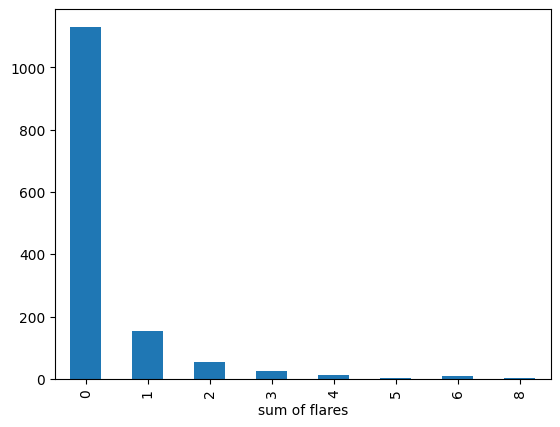

In [37]:
df['sum of flares'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='target'>

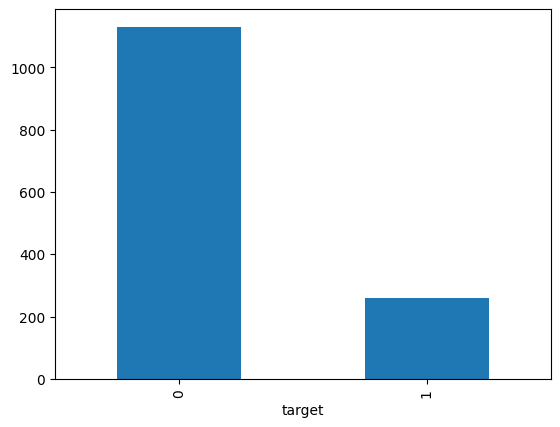

In [45]:
df['target'].value_counts().sort_index().plot(kind='bar')

In [47]:
# Definimos funciones
def get_auroc_from_features(data, target, features):
  X_train, X_val, Y_train, Y_val = train_test_split(data[features], data["BIN_CTE_12"], test_size = 0.2, random_state = 42)
  model = LogisticRegression()
  model.fit(X_train, Y_train)
  auc_train = roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])
  auc_val = roc_auc_score(Y_val, model.predict_proba(X_val)[:,1])
  auc_whole = roc_auc_score(data["BIN_CTE_12"], model.predict_proba(data[features])[:,1])
  max_correlation = get_top_abs_correlations(data[features])[0]
  return auc_train, auc_val, auc_whole, max_correlation
# Ejemplo get_auroc_from_features(nht, target = "BIN_CTE_12", features = ["feature_941_woe", "feature_1183_woe", "feature_1425_woe"])

def get_top_abs_correlations(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_redundant_pairs(data):
    pairs_to_drop = set()
    cols = data.columns
    for i in range(0, data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_auroc_increment(data, target, features):
  import itertools
  num_low_input_variables = 0
  current_auroc = get_auroc_from_features(data= data, target = 'BIN_CTE_12', features = features)[2]
  lowest_input = 100
  new_feature_set = []

  print("--------------------")
  print("ROC", current_auroc*100)
  print("--------------------")

  for regression in list(itertools.combinations(features, len(features)-1)):

    new_auroc = get_auroc_from_features(data= data, target = 'BIN_CTE_12', features = list(regression))[2]


    print("--------------------")
    print("APORTACIÓN ROC", list(set(features) - set(list(regression))))
    print((current_auroc - new_auroc)*100)
    print("--------------------")

    if current_auroc - new_auroc < 0.001:
      if current_auroc - new_auroc < lowest_input:

        num_low_input_variables = num_low_input_variables + 1
        lowest_input = current_auroc - new_auroc
        new_feature_set = list(regression)

        print("Low input:", current_auroc - new_auroc)
        print("New feature set:", new_feature_set)

        print("")

  if new_feature_set == []:
    print("No new feature set")
    new_feature_set = features

  return new_feature_set, num_low_input_variables

def get_auroc_from_features_with_coef(data, target, features):
  X_train, X_val, Y_train, Y_val = train_test_split(data[features], data[target], test_size = 0.2, random_state = 42)
  model = LogisticRegression()
  model.fit(X_train, Y_train)
  auc_train = roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])
  auc_val = roc_auc_score(Y_val, model.predict_proba(X_val)[:,1])
  auc_whole = roc_auc_score(data[target], model.predict_proba(data[features])[:,1])
  max_correlation = get_top_abs_correlations(data[features])[0]
  return auc_train, auc_val, auc_whole, max_correlation, model.coef_, model.intercept_

def get_model_from_features(data, target, features):
  X_train, X_val, Y_train, Y_val = train_test_split(data[features], data[target], test_size = 0.2, random_state = 42)
  model = LogisticRegression()
  model.fit(X_train, Y_train)
  auc_train = roc_auc_score(Y_train, model.predict_proba(X_train)[:,1])
  auc_val = roc_auc_score(Y_val, model.predict_proba(X_val)[:,1])
  auc_whole = roc_auc_score(data[target], model.predict_proba(data[features])[:,1])
  max_correlation = get_top_abs_correlations(data[features])[0]
  return model, model.coef_, model.intercept_


def get_auroc_increment(data, target, features):
  import itertools
  num_low_input_variables = 0
  current_auroc = get_auroc_from_features_with_coef(data= data, target = target, features = features)[2]
  lowest_input = 100
  new_feature_set = []

  print("--------------------")
  print("ROC", current_auroc*100)
  print("--------------------")

  for regression in list(itertools.combinations(features, len(features)-1)):

    new_auroc = get_auroc_from_features_with_coef(data= data, target = target, features = list(regression))[2]


    print("--------------------")
    print("APORTACIÓN ROC", list(set(features) - set(list(regression))))
    print((current_auroc - new_auroc)*100)
    print("--------------------")

    if current_auroc - new_auroc < 0.001:
      if current_auroc - new_auroc < lowest_input:

        num_low_input_variables = num_low_input_variables + 1
        lowest_input = current_auroc - new_auroc
        new_feature_set = list(regression)

        print("Low input:", current_auroc - new_auroc)
        print("New feature set:", new_feature_set)

        print("")

  if new_feature_set == []:
    print("No new feature set")
    new_feature_set = features

  return new_feature_set, num_low_input_variables

['modified Zurich class',
 'largest spot size',
 'spot distribution',
 'activity',
 'evolution',
 'previous 24 hour flare activity',
 'historically-complex',
 'became complex on this pass',
 'area',
 'area of largest spot']

In [53]:
get_auroc_from_features_with_coef(df, target = "target", features = list(df.columns)[:-5])

<ipython-input-47-e843013c52a1>:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_correlation = get_top_abs_correlations(data[features])[0]


(0.7591665320626716,
 0.7409474206349206,
 0.7549492602589948,
 0.5252585536670658,
 array([[ 0.11452939, -0.07501523, -0.82864038,  0.67847294,  0.23877494,
          0.04960745,  0.21764388,  0.3649334 ,  0.14084981, -0.13591126]]),
 array([-2.52670638]))